<a href="https://colab.research.google.com/github/rachit-agnihotri/decisiontreelearning/blob/main/fault_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# prompt: how to plot .dat files using tsne plot


import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


253952


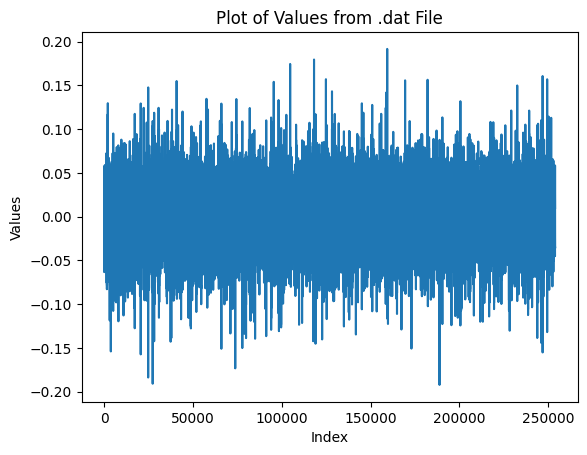

In [3]:
import matplotlib.pyplot as plt

def read_dat_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Split the line by commas and convert each value to a float
            row = [float(value) for value in line.strip().split(',')]
            data.append(row)
    return data

def plot_dat_file(file_path):
    data = read_dat_file(file_path)
    print(len(data[0]))

    # Assuming each row represents a different series, plot each one
    for row in data:
        plt.plot(row)

    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Plot of Values from .dat File')
    plt.show()

plot_dat_file('/content/drive/MyDrive/SingleFaultPureData-20240827T080718Z-001/SingleFaultPureData/1_1_1.dat')


Total data shape: (371, 253952)


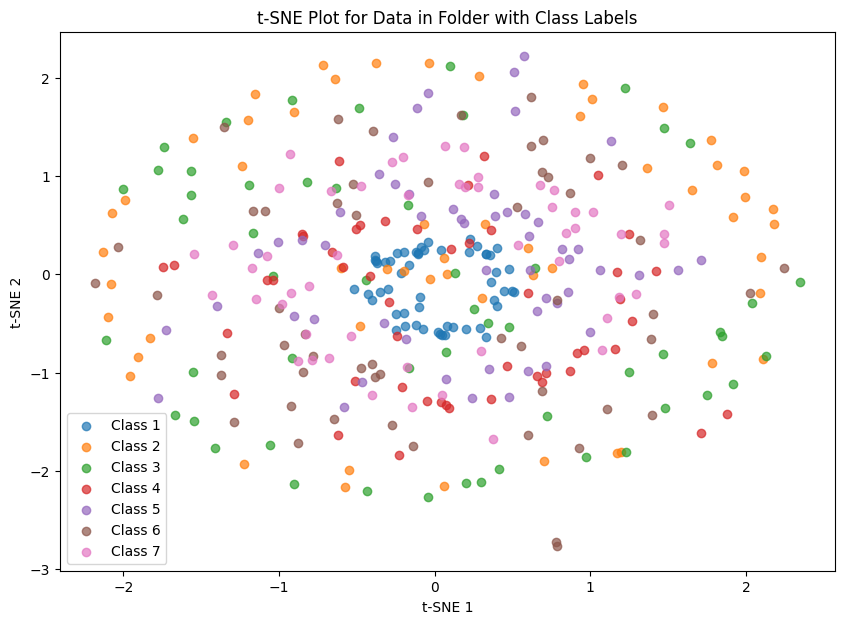

In [12]:
def plot_tsne_with_labels(folder_path, perplexity=30, n_iter=1000, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Print the shape of the data
    print(f"Total data shape: {data.shape}")

    # Convert data to PyTorch tensor and move it to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

    # Apply t-SNE (still on CPU)
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=random_state, method='barnes_hut')
    tsne_results = tsne.fit_transform(data_tensor.cpu().numpy())

    # Plot the t-SNE results with different colors for each class
    plt.figure(figsize=(10, 7))
    for class_label in np.unique(labels):
        indices = np.where(labels == class_label)
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], alpha=0.7, label=f'Class {class_label}')

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title('t-SNE Plot for Data in Folder with Class Labels')
    plt.legend()
    plt.show()

# Example usage:
plot_tsne_with_labels('/content/drive/MyDrive/SingleFaultPureData-20240827T080718Z-001/SingleFaultPureData')

Total data shape: (371, 253952)


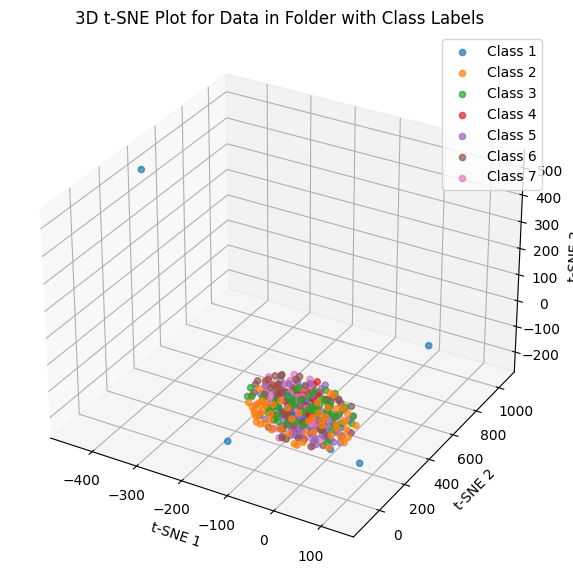

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def read_all_dat_files_with_labels(folder_path):
    all_data = []
    all_labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.dat'):
            file_path = os.path.join(folder_path, file_name)
            data = read_dat_file(file_path)

            # Extract class label from the second number in the filename
            class_label = int(file_name.split('_')[1])

            # Append the data and corresponding labels
            all_data.extend(data)
            all_labels.extend([class_label] * len(data))

    return np.array(all_data), np.array(all_labels)

def plot_3d_tsne_with_labels(folder_path, perplexity=30, n_iter=1000, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Print the shape of the data
    print(f"Total data shape: {data.shape}")

    # Convert data to PyTorch tensor and move it to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

    # Apply t-SNE for 3D
    tsne = TSNE(n_components=3, perplexity=perplexity, n_iter=n_iter, random_state=random_state, method='barnes_hut')
    tsne_results = tsne.fit_transform(data_tensor.cpu().numpy())

    # Plot the 3D t-SNE results with different colors for each class
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for class_label in np.unique(labels):
        indices = np.where(labels == class_label)
        ax.scatter(tsne_results[indices, 0], tsne_results[indices, 1], tsne_results[indices, 2], alpha=0.7, label=f'Class {class_label}')

    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')
    ax.set_title('3D t-SNE Plot for Data in Folder with Class Labels')
    ax.legend()
    plt.show()

# Example usage:
plot_3d_tsne_with_labels('/content/drive/MyDrive/SingleFaultPureData-20240827T080718Z-001/SingleFaultPureData')


# Umap

In [5]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.9 MB/s eta 0:00:00


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import umap
from mpl_toolkits.mplot3d import Axes3D

# Function to read all .dat files and extract labels
def read_all_dat_files_with_labels(folder_path):
    all_data = []
    all_labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.dat'):
            file_path = os.path.join(folder_path, file_name)
            data = read_dat_file(file_path)

            # Extract class label from the second number in the filename
            class_label = int(file_name.split('_')[1])

            # Append the data and corresponding labels
            all_data.extend(data)
            all_labels.extend([class_label] * len(data))

    return np.array(all_data), np.array(all_labels)

# Function to plot 2D UMAP with labels
def plot_2d_umap_with_labels(folder_path, n_neighbors=15, min_dist=0.1, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Print the shape of the data
    print(f"Total data shape: {data.shape}")

    # Convert data to PyTorch tensor and move it to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

    # Apply UMAP for 2D
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
    umap_results = reducer.fit_transform(data_tensor.cpu().numpy())

    # Plot the 2D UMAP results with different colors for each class
    plt.figure(figsize=(10, 7))
    for class_label in np.unique(labels):
        indices = np.where(labels == class_label)
        plt.scatter(umap_results[indices, 0], umap_results[indices, 1], alpha=0.7, label=f'Class {class_label}')

    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.title('2D UMAP Plot for Data in Folder with Class Labels')
    plt.legend()
    plt.show()

# Function to plot 3D UMAP with labels
def plot_3d_umap_with_labels(folder_path, n_neighbors=15, min_dist=0.1, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Print the shape of the data
    print(f"Total data shape: {data.shape}")

    # Convert data to PyTorch tensor and move it to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

    # Apply UMAP for 3D
    reducer = umap.UMAP(n_components=3, n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
    umap_results = reducer.fit_transform(data_tensor.cpu().numpy())

    # Plot the 3D UMAP results with different colors for each class
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for class_label in np.unique(labels):
        indices = np.where(labels == class_label)
        ax.scatter(umap_results[indices, 0], umap_results[indices, 1], umap_results[indices, 2], alpha=0.7, label=f'Class {class_label}')

    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_zlabel('UMAP 3')
    ax.set_title('3D UMAP Plot for Data in Folder with Class Labels')
    ax.legend()
    plt.show()

# Example usage:
folder_path = '/content/drive/MyDrive/SingleFaultPureData-20240827T080718Z-001/SingleFaultPureData'




Total data shape: (371, 253952)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


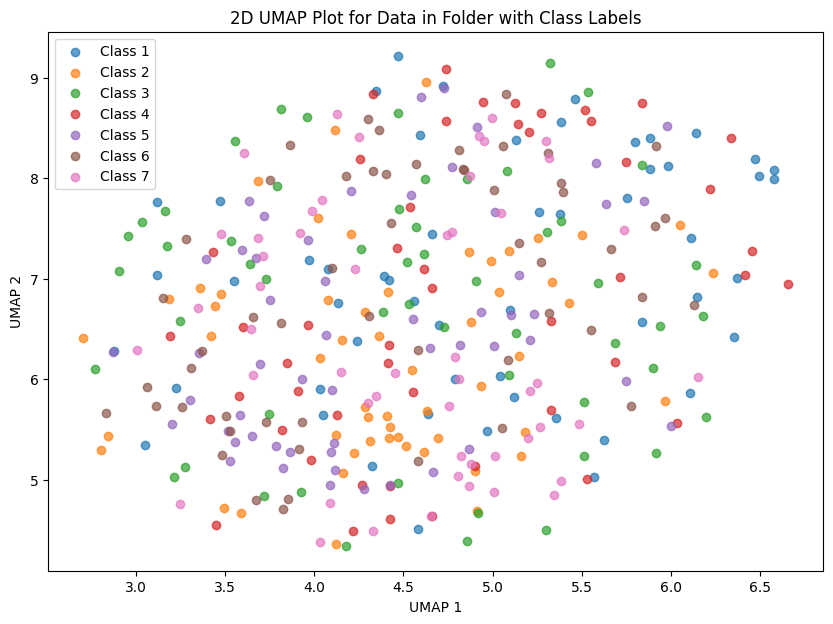

In [7]:
# Generate 2D UMAP plot
plot_2d_umap_with_labels(folder_path)



Total data shape: (371, 253952)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


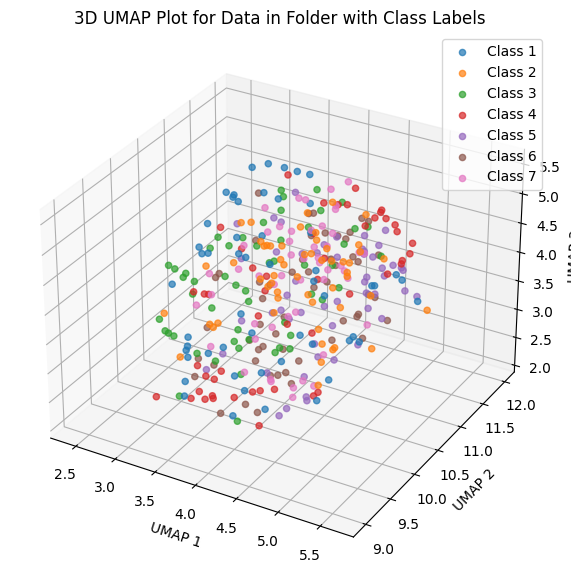

In [8]:
# Generate 3D UMAP plot
plot_3d_umap_with_labels(folder_path)

Total data shape: (371, 253952)


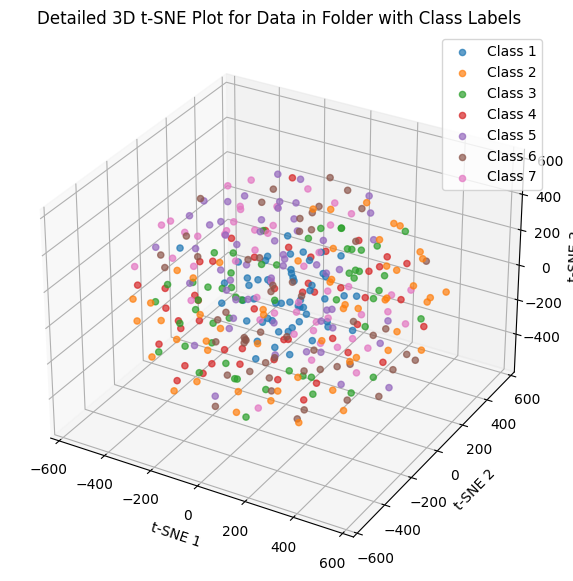

In [9]:
# Function to read all .dat files and extract labels
def read_all_dat_files_with_labels(folder_path):
    all_data = []
    all_labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.dat'):
            file_path = os.path.join(folder_path, file_name)
            data = read_dat_file(file_path)

            # Extract class label from the second number in the filename
            class_label = int(file_name.split('_')[1])

            # Append the data and corresponding labels
            all_data.extend(data)
            all_labels.extend([class_label] * len(data))

    return np.array(all_data), np.array(all_labels)

# Function to plot a more detailed 3D t-SNE with labels
def plot_detailed_3d_tsne_with_labels(folder_path, perplexity=40, n_iter=5000, learning_rate=200, early_exaggeration=12, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Print the shape of the data
    print(f"Total data shape: {data.shape}")

    # Convert data to PyTorch tensor and move it to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

    # Apply t-SNE for 3D with modified parameters for more detailed separation
    tsne = TSNE(n_components=3, perplexity=perplexity, n_iter=n_iter, learning_rate=learning_rate,
                early_exaggeration=early_exaggeration, random_state=random_state, method='barnes_hut')
    tsne_results = tsne.fit_transform(data_tensor.cpu().numpy())

    # Plot the 3D t-SNE results with different colors for each class
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for class_label in np.unique(labels):
        indices = np.where(labels == class_label)
        ax.scatter(tsne_results[indices, 0], tsne_results[indices, 1], tsne_results[indices, 2], alpha=0.7, label=f'Class {class_label}')

    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')
    ax.set_title('Detailed 3D t-SNE Plot for Data in Folder with Class Labels')
    ax.legend()
    plt.show()

# Example usage:
folder_path = '/content/drive/MyDrive/SingleFaultPureData-20240827T080718Z-001/SingleFaultPureData'

# Generate detailed 3D t-SNE plot
plot_detailed_3d_tsne_with_labels(folder_path)


Total data shape: (371, 253952)


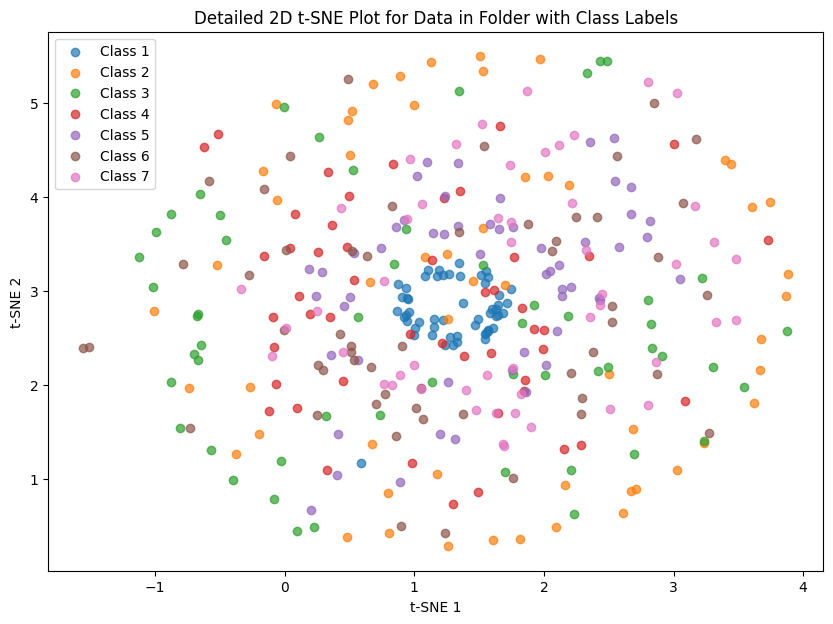

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE

# Function to read all .dat files and extract labels
def read_all_dat_files_with_labels(folder_path):
    all_data = []
    all_labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.dat'):
            file_path = os.path.join(folder_path, file_name)
            data = read_dat_file(file_path)

            # Extract class label from the second number in the filename
            class_label = int(file_name.split('_')[1])

            # Append the data and corresponding labels
            all_data.extend(data)
            all_labels.extend([class_label] * len(data))

    return np.array(all_data), np.array(all_labels)

# Function to plot a more detailed 2D t-SNE with labels
def plot_detailed_2d_tsne_with_labels(folder_path, perplexity=40, n_iter=5000, learning_rate=200, early_exaggeration=12, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Print the shape of the data
    print(f"Total data shape: {data.shape}")

    # Convert data to PyTorch tensor and move it to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

    # Apply t-SNE for 2D with modified parameters for more detailed separation
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, learning_rate=learning_rate,
                early_exaggeration=early_exaggeration, random_state=random_state, method='barnes_hut')
    tsne_results = tsne.fit_transform(data_tensor.cpu().numpy())

    # Plot the 2D t-SNE results with different colors for each class
    plt.figure(figsize=(10, 7))
    for class_label in np.unique(labels):
        indices = np.where(labels == class_label)
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], alpha=0.7, label=f'Class {class_label}')

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title('Detailed 2D t-SNE Plot for Data in Folder with Class Labels')
    plt.legend()
    plt.show()

# Example usage:
folder_path = '/content/drive/MyDrive/SingleFaultPureData-20240827T080718Z-001/SingleFaultPureData'

# Generate detailed 2D t-SNE plot
plot_detailed_2d_tsne_with_labels(folder_path)


Total data shape: (371, 253952)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


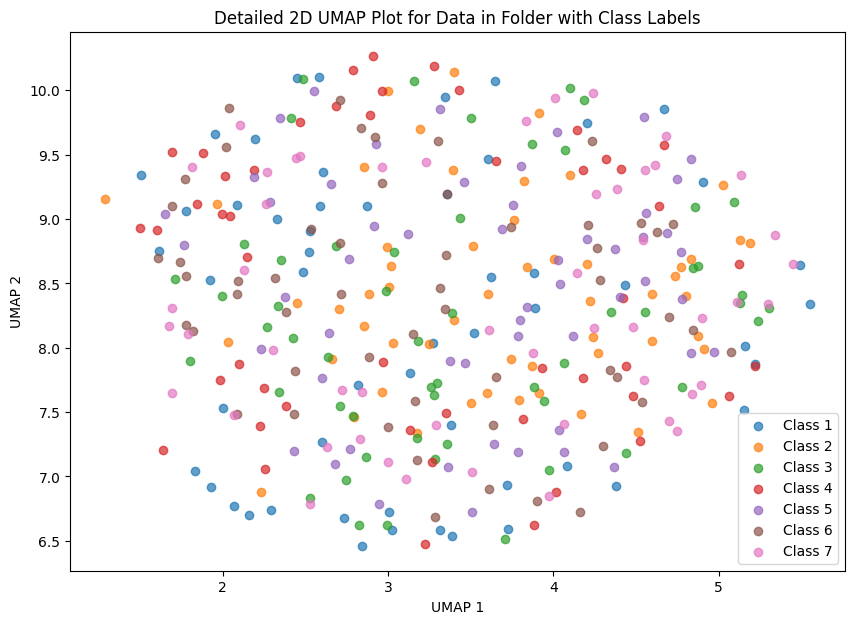

In [11]:
import umap

# Function to plot a more detailed 2D UMAP with labels
def plot_detailed_2d_umap_with_labels(folder_path, n_neighbors=30, min_dist=0.05, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Print the shape of the data
    print(f"Total data shape: {data.shape}")

    # Convert data to PyTorch tensor and move it to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

    # Apply UMAP for 2D with modified parameters for more detailed separation
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, random_state=random_state)
    umap_results = reducer.fit_transform(data_tensor.cpu().numpy())

    # Plot the 2D UMAP results with different colors for each class
    plt.figure(figsize=(10, 7))
    for class_label in np.unique(labels):
        indices = np.where(labels == class_label)
        plt.scatter(umap_results[indices, 0], umap_results[indices, 1], alpha=0.7, label=f'Class {class_label}')

    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.title('Detailed 2D UMAP Plot for Data in Folder with Class Labels')
    plt.legend()
    plt.show()

# Example usage:
folder_path = '/content/drive/MyDrive/SingleFaultPureData-20240827T080718Z-001/SingleFaultPureData'

# Generate detailed 2D UMAP plot
plot_detailed_2d_umap_with_labels(folder_path)


In [18]:

# Function to read .dat files and extract labels
def read_all_dat_files_with_labels(folder_path):
    all_data = []
    all_labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.dat'):
            file_path = os.path.join(folder_path, file_name)
            data = np.loadtxt(file_path, delimiter=',')

            if data.ndim == 1:
                raise ValueError(f"Data in file {file_name} appears to be 1D. Expected 2D array.")

            class_label = int(file_name.split('_')[1])
            all_data.append(data)
            all_labels.extend([class_label] * len(data))

    all_data = np.vstack(all_data)
    return all_data, np.array(all_labels)

# PCA + t-SNE function for 2D projection
def pca_then_tsne_2d(folder_path, n_components_pca=50, perplexity=30, n_iter=1000, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Step 1: Apply PCA to reduce dimensionality
    pca = PCA(n_components=n_components_pca, random_state=random_state)
    pca_result = pca.fit_transform(data)

    # Step 2: Apply t-SNE to the PCA-reduced data
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=random_state)
    tsne_result = tsne.fit_transform(pca_result)

    # Plot the results with class labels
    plt.figure(figsize=(10, 7))
    for class_label in np.unique(labels):
        indices = np.where(labels == class_label)
        plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], label=f'Class {class_label}', alpha=0.7)

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title('PCA + t-SNE 2D Visualization')
    plt.legend()
    plt.show()
folder_path = '/content/drive/MyDrive/SingleFaultPureData-20240827T080718Z-001/SingleFaultPureData'
pca_then_tsne_2d(folder_path)

ValueError: Data in file 1_7_371.dat appears to be 1D. Expected 2D array.

In [19]:
!pip install plotly


In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Function to read all .dat files and extract labels
def read_all_dat_files_with_labels(folder_path):
    all_data = []
    all_labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.dat'):
            file_path = os.path.join(folder_path, file_name)
            data = read_dat_file(file_path)

            # Extract class label from the second number in the filename
            class_label = int(file_name.split('_')[1])

            # Append the data and corresponding labels
            all_data.extend(data)
            all_labels.extend([class_label] * len(data))

    return np.array(all_data), np.array(all_labels)

# Function to plot detailed 2D t-SNE with labels using Plotly
def plot_detailed_2d_tsne_with_labels(folder_path, perplexity=40, n_iter=5000, learning_rate=200, early_exaggeration=12, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Convert data to PyTorch tensor and move it to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

    # Apply t-SNE for 2D with modified parameters for more detailed separation
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, learning_rate=learning_rate,
                early_exaggeration=early_exaggeration, random_state=random_state, method='barnes_hut')
    tsne_results = tsne.fit_transform(data_tensor.cpu().numpy())

    # Create a DataFrame for Plotly
    df = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2'])
    df['Label'] = labels

    # Check DataFrame shape
    print(f"DataFrame shape: {df.shape}")

    # Plot the 2D t-SNE results with Plotly
    fig = px.scatter(df, x='t-SNE 1', y='t-SNE 2', color='Label',
                     title='Detailed 2D t-SNE Plot for Data in Folder with Class Labels',
                     labels={'t-SNE 1': 't-SNE 1', 't-SNE 2': 't-SNE 2', 'Label': 'Class'},
                     color_continuous_scale=px.colors.sequential.Viridis)

    fig.show()

# Function to plot detailed 3D t-SNE with labels using Plotly
def plot_detailed_3d_tsne_with_labels(folder_path, perplexity=40, n_iter=5000, learning_rate=200, early_exaggeration=12, random_state=42):
    data, labels = read_all_dat_files_with_labels(folder_path)

    # Convert data to PyTorch tensor and move it to GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_tensor = torch.tensor(data, dtype=torch.float32).to(device)

    # Apply t-SNE for 3D with modified parameters for more detailed separation
    tsne = TSNE(n_components=3, perplexity=perplexity, n_iter=n_iter, learning_rate=learning_rate,
                early_exaggeration=early_exaggeration, random_state=random_state, method='barnes_hut')
    tsne_results = tsne.fit_transform(data_tensor.cpu().numpy())

    # Create a DataFrame for Plotly
    df = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2', 't-SNE 3'])
    df['Label'] = labels

    # Check DataFrame shape
    print(f"DataFrame shape: {df.shape}")

    # Plot the 3D t-SNE results with Plotly
    fig = px.scatter_3d(df, x='t-SNE 1', y='t-SNE 2', z='t-SNE 3', color='Label',
                        title='Detailed 3D t-SNE Plot for Data in Folder with Class Labels',
                        labels={'t-SNE 1': 't-SNE 1', 't-SNE 2': 't-SNE 2', 't-SNE 3': 't-SNE 3', 'Label': 'Class'},
                        color_continuous_scale=px.colors.sequential.Viridis)

    fig.show()

# Example usage
folder_path = '/content/drive/MyDrive/SingleFaultPureData-20240827T080718Z-001/SingleFaultPureData'

# Generate detailed 2D and 3D t-SNE plots
plot_detailed_2d_tsne_with_labels(folder_path)
plot_detailed_3d_tsne_with_labels(folder_path)


DataFrame shape: (371, 3)


DataFrame shape: (371, 4)
